<a href="https://colab.research.google.com/github/jibbsmathew/BritishAirways_DataScienceProject/blob/main/BritishAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | Booked online months ago an...
1,✅ Trip Verified | The flight was on time. The...
2,"Not Verified | Angry, disappointed, and unsat..."
3,"✅ Trip Verified | As an infrequent flyer, Bri..."
4,"Not Verified | A totally unremarkable flight,..."
...,...
995,✅ Trip Verified | San Francisco to London. Te...
996,✅ Trip Verified | Heathrow to Vancouver. The ...
997,✅ Trip Verified | London to Bucharest. First ...
998,✅ Trip Verified | I forgot I had purchased a ...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

WORD CLOUD

In [ ]:
!pip install pandas matplotlib wordcloud

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
text = ' '.join(df['reviews'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

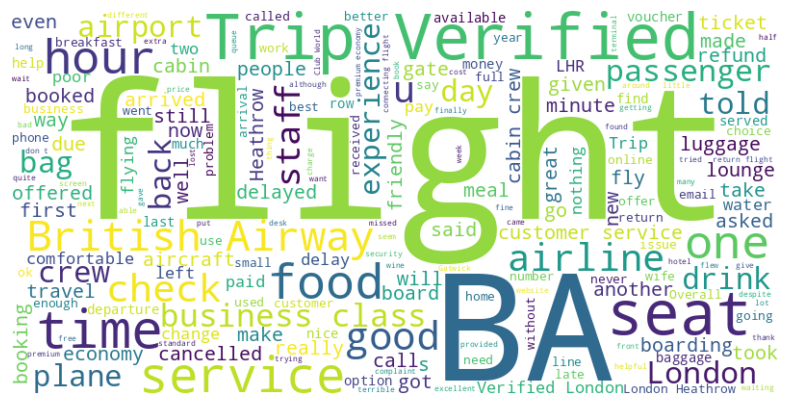

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Save the word cloud to an image file (e.g., 'wordcloud.png')
wordcloud.to_file("wordcloud.png")

TOPIC MODELLING

In [ ]:
!pip install pandas gensim nltk

In [ ]:
from nltk.corpus import stopwords
from gensim import corpora, models

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: [word for word in x.lower().split() if word not in stop_words])

In [ ]:
dictionary = corpora.Dictionary(df['reviews'])

corpus = [dictionary.doc2bow(doc) for doc in df['reviews']]

In [ ]:
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)


In [ ]:
for topic, words in lda_model.print_topics():
    print(f"Topic {topic}: {words}\n")


Topic 0: 0.022*"flight" + 0.011*"verified" + 0.011*"|" + 0.009*"ba" + 0.008*"trip" + 0.007*"✅" + 0.006*"us" + 0.006*"-" + 0.006*"one" + 0.004*"service"

Topic 1: 0.011*"flight" + 0.009*"|" + 0.009*"verified" + 0.008*"trip" + 0.007*"✅" + 0.006*"ba" + 0.006*"british" + 0.006*"staff" + 0.005*"airways" + 0.005*"-"

Topic 2: 0.017*"flight" + 0.017*"ba" + 0.010*"|" + 0.010*"verified" + 0.008*"trip" + 0.007*"london" + 0.007*"✅" + 0.006*"get" + 0.006*"service" + 0.005*"british"

Topic 3: 0.012*"ba" + 0.011*"flight" + 0.009*"verified" + 0.009*"|" + 0.008*"service" + 0.008*"trip" + 0.007*"customer" + 0.007*"would" + 0.007*"british" + 0.006*"✅"

Topic 4: 0.011*"verified" + 0.011*"|" + 0.011*"flight" + 0.011*"service" + 0.010*"ba" + 0.009*"trip" + 0.009*"✅" + 0.008*"-" + 0.007*"british" + 0.007*"class"

Topic 5: 0.019*"flight" + 0.011*"verified" + 0.011*"|" + 0.011*"ba" + 0.009*"trip" + 0.009*"✅" + 0.006*"crew" + 0.006*"time" + 0.005*"us" + 0.005*"good"

Topic 6: 0.021*"flight" + 0.014*"ba" + 0.01

In [ ]:
df['topic'] = df['reviews'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(x))[0][0])


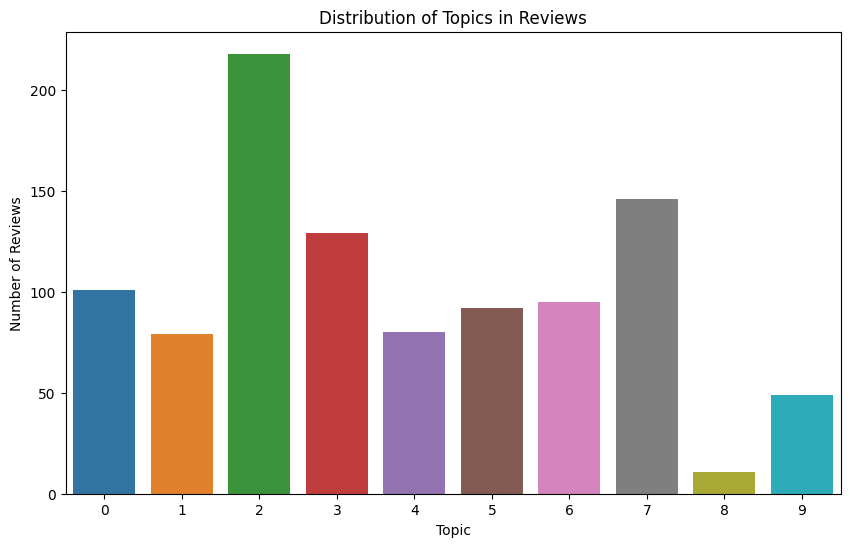

In [ ]:
import seaborn as sns

topic_counts = df['topic'].value_counts().reset_index()
topic_counts.columns = ['Topic', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Topic', y='Count', data=topic_counts)
plt.title("Distribution of Topics in Reviews")
plt.xlabel("Topic")
plt.ylabel("Number of Reviews")
plt.show()


SENTIMENT ANALYSIS

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
 analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    text = ' '.join(text)

    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    sentiment_label = 'positive' if compound_score >= 0.05 else 'negative' if compound_score <= -0.05 else 'neutral'
    return sentiment_scores, sentiment_label

df['sentiment_scores'], df['sentiment_label'] = zip(*df['reviews'].apply(get_sentiment))

print(df)

                                               reviews  topic  \
0    [✅, trip, verified, |, booked, online, months,...      6   
1    [✅, trip, verified, |, flight, time., crew, po...      2   
2    [verified, |, angry,, disappointed,, unsatisfi...      6   
3    [✅, trip, verified, |, infrequent, flyer,, bri...      1   
4    [verified, |, totally, unremarkable, flight,, ...      0   
..                                                 ...    ...   
995  [✅, trip, verified, |, san, francisco, london....      0   
996  [✅, trip, verified, |, heathrow, vancouver., s...      6   
997  [✅, trip, verified, |, london, bucharest., fir...      7   
998  [✅, trip, verified, |, forgot, purchased, hand...      3   
999  [✅, trip, verified, |, passenger, front, recli...      7   

                                      sentiment_scores sentiment_label  
0    {'neg': 0.133, 'neu': 0.764, 'pos': 0.103, 'co...        negative  
1    {'neg': 0.161, 'neu': 0.661, 'pos': 0.178, 'co...        positive  


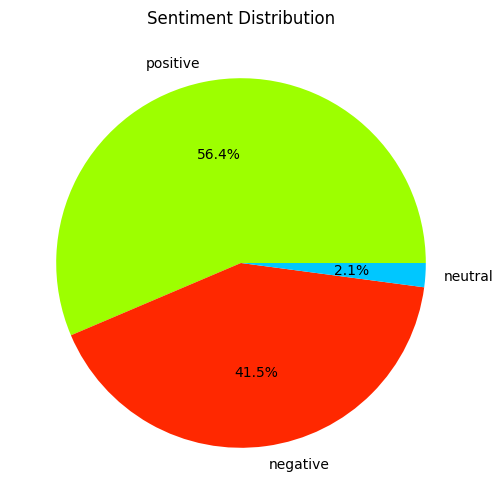

In [ ]:
sentiment_counts = df['sentiment_label'].value_counts()

colors = ['#9dff00','#ff2800', '#00c7ff']

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%')
plt.title("Sentiment Distribution")

plt.show()